# Introduction to Happywhale competition

We can have a first look at the [data](https://www.kaggle.com/c/happy-whale-and-dolphin/data) using the data explorer of Kaggle. We can see that images have different qualities ranging from a dorsal fin to a distant view of the back of the mammal.

Let’s have a more complete view. First add the data through the Kaggle UI. They are afterwards located in */kaggle/input/happy-whale-and-dolphin* folder.

In [1]:
!ls -l /kaggle/input/happy-whale-and-dolphin

total 4668
-rw-r--r-- 1 nobody nogroup 2404234 Feb  1 16:45 sample_submission.csv
drwxr-xr-x 2 nobody nogroup       0 Feb  1 16:47 test_images
-rw-r--r-- 1 nobody nogroup 2371769 Feb  1 16:47 train.csv
drwxr-xr-x 2 nobody nogroup       0 Feb  1 16:51 train_images


## Data loading

Let’s load the images metadata described in `train.csv` file. 

In [2]:
import pandas as pd
df = pd.read_csv("/kaggle/input/happy-whale-and-dolphin/train.csv")
df

,image,species,individual_id
0,00021adfb725ed.jpg,melon_headed_whale,cadddb1636b9
1,000562241d384d.jpg,humpback_whale,1a71fbb72250
2,0007c33415ce37.jpg,false_killer_whale,60008f293a2b
3,0007d9bca26a99.jpg,bottlenose_dolphin,4b00fe572063
4,00087baf5cef7a.jpg,humpback_whale,8e5253662392
...,...,...,...
51028,fff639a7a78b3f.jpg,beluga,5ac053677ed1
51029,fff8b32daff17e.jpg,cuviers_beaked_whale,1184686361b3
51030,fff94675cc1aef.jpg,blue_whale,5401612696b9
51031,fffbc5dd642d8c.jpg,beluga,4000b3d7c24e


We can notice that our train data describes 51 033 images with one ID field for the photography filename and 2 others fields. The latter describe the animal specy and which individual it is.

## Counting images

### Per individual

In [3]:
individuals = df.drop(columns = ['species']).groupby(['individual_id']).count().rename(columns = { 'image': 'images_count'})
individuals

,images_count
individual_id,
0013f1f5f2f0,1
001618e0a31e,1
0018a0f40586,1
00191b9a2f6f,1
001a09e48b2d,4
...,...
fff35b58c591,1
fff591b41cce,4
fffb11ff4575,4


In [4]:
individuals.describe()

,images_count
count,15587.000000
mean,3.274075
std,9.242430
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,400.000000


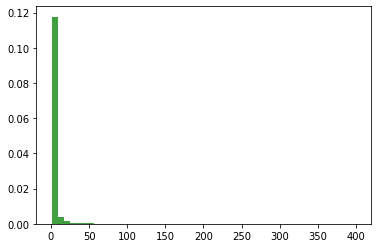

In [5]:
from matplotlib import pyplot as plt
plt.hist(individuals.images_count, 50, density=True, facecolor='g', alpha=0.75)
plt.show()

The 51 033 pictures describe 15 887 individuals. The distribution is very skewed:
- 75% of individuals have only one or two pictures
- 400 pictures are dedicated to only one individual

### Per specy

In [6]:
species = df.drop(columns = ['individual_id']).groupby(['species']).count().rename(columns = { 'image': 'images_count'}).sort_values(by = ['images_count'], ascending = False)
print(species.shape)
species

(30, 1)


,images_count
species,
bottlenose_dolphin,9664
beluga,7443
humpback_whale,7392
blue_whale,4830
false_killer_whale,3326
dusky_dolphin,3139
spinner_dolphin,1700
melon_headed_whale,1689
minke_whale,1608


In [7]:
species.describe()

,images_count
count,30.000000
mean,1701.100000
std,2480.322273
min,14.000000
25%,231.250000
50%,678.000000
75%,1668.750000
max,9664.000000


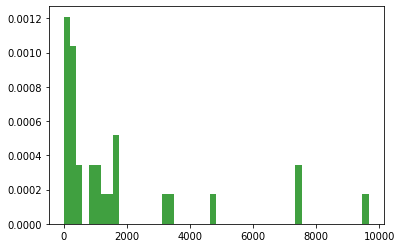

In [8]:
plt.hist(species.images_count, 50, density=True, facecolor='g', alpha=0.75)
plt.show()

The 51 887 images describe 30 species. Again, the distribution is skewed. Frasiers dolphin specy is descibed by only 14 images, while Bottle nose dolphin (9664), Beluga (7443) and Humpback whale (7392) are over represented.

## How species are described

So, all together, data contains 51 033 images of 15 587 individuals from 30 species.

Whales are a species included in the *Cetacea* infraorder.
Dolphin are a species included in the *Cetacea* infraorder and the *Delphinidae* superfamily.
Beluga, or more commonly called **white whale**, is a specy from the *Cetacea* infraorder and the *Delphinidae* superfamily.
Globis, or more commonly called **pilot whale**, is a specy from the *Cetacea* infraorder and the *Delphinidae* superfamily.

In [9]:
individuals_counts = df.drop(columns = ['image']).groupby(['species']).nunique().rename(columns = { 'individual_id': 'individuals_count'})
counts = pd.merge(species, individuals_counts, how = 'left', on = ['species'])
counts = counts.assign(ratio = counts.images_count / counts.individuals_count).sort_values(by = ['ratio'], ascending = False)
counts

,images_count,individuals_count,ratio
species,,,
false_killer_whale,3326,196,16.969388
bottlenose_dolphin,9664,613,15.765090
kiler_whale,962,73,13.178082
minke_whale,1608,128,12.562500
common_dolphin,347,38,9.131579
beluga,7443,1012,7.354743
gray_whale,1123,185,6.070270
bottlenose_dolpin,1117,291,3.838488
killer_whale,1493,399,3.741855
